In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cs = pd.read_csv('Cereals.csv')

In [ ]:
cs

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
cs.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
cs_list = list(cs.select_dtypes(include='number'))

In [ ]:
for i in cs_list:
  cs[i]=cs[i].replace(-1,cs[i].mean())

In [ ]:
for i in cs_list:
  Q1 = cs[i].quantile(0.25)
  Q3 = cs[i].quantile(0.75)
  IQR = Q3 - Q1
  lb = Q1 - 1.5 * IQR
  ub = Q3 + 1.5 * IQR
  for(j) in cs[i]:
    if(j < lb or j > ub):
      cs[i]=cs[i].replace(j,cs[i].mean())

In [ ]:
cs.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,106.985654,2.401152,1.013158,179.020949,1.798762,14.930575,7.038608,85.850105,25.841048,2.197368,1.001949,0.818651,41.651032
std,8.044886,0.875694,1.013159,60.589164,1.520598,3.737575,4.377048,48.065318,1.892021,0.832982,0.007984,0.213336,12.463954
min,90.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.000000,1.000000,0.986903,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.217452,1.000000,180.000000,1.728610,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.000000,3.000000,1.000000,1.000000,50.031833
max,120.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,31.267313,3.000000,1.030000,1.330000,74.472949


In [ ]:
cs['name'].nunique()

76

In [ ]:
cs['mfr'].value_counts()

,count
mfr,
K,23
G,22
P,9
R,8
Q,8
N,5
A,1


In [ ]:
cs['type'].value_counts()

,count
type,
C,73
H,3


In [ ]:
cs.groupby('type')['rating'].mean()

,rating
type,
C,41.031032
H,56.737708


In [ ]:
print(cs['fiber'].max())
print(cs['sugars'].min())

6.0
0.0


In [ ]:
cs[cs['protein'] > 3]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,All-Bran,K,C,107.368421,4.0,1,260.000000,2.048684,7.0,5.0,96.148892,25.0,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,107.860111,4.0,0,140.000000,1.957220,8.0,0.0,93.203483,25.0,3,1.0,0.50,42.327057
40,Life,Q,C,100.000000,4.0,2,150.000000,2.000000,12.0,6.0,95.000000,25.0,2,1.0,0.67,45.328074
42,Maypo,A,H,100.000000,4.0,1,160.065789,0.000000,16.0,3.0,95.000000,25.0,2,1.0,1.00,54.850917
43,"Muesli_Raisins,_Dates,_&amp;_Almonds",R,C,108.422388,4.0,3,95.000000,3.000000,16.0,11.0,170.000000,25.0,3,1.0,1.00,37.136863
44,"Muesli_Raisins,_Peaches,_&amp;_Pecans",R,C,108.422388,4.0,3,150.000000,3.000000,16.0,11.0,170.000000,25.0,3,1.0,1.00,34.139765
55,Quaker_Oat_Squares,Q,C,100.000000,4.0,1,135.000000,2.000000,14.0,6.0,110.000000,25.0,3,1.0,0.50,49.511874


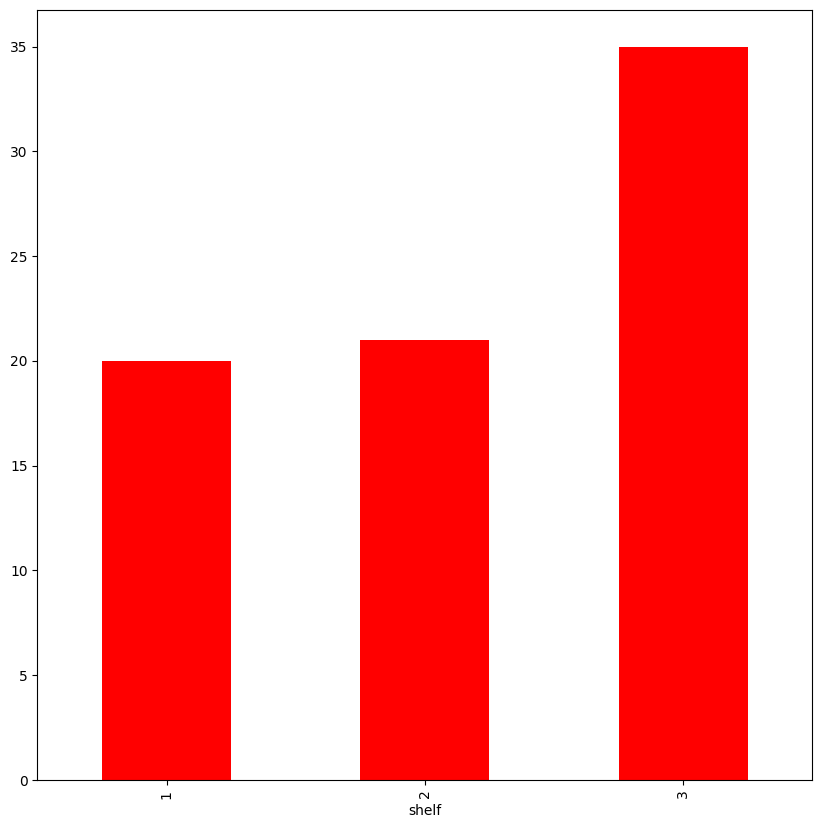

In [ ]:
plt.figure(figsize=(10,10))
s=cs['shelf'].value_counts().sort_index()
s.plot(kind='bar', color='red')
plt.show()

In [ ]:
cs.sort_values(by='sugars')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-Bran_with_Extra_Fiber,K,C,107.860111,4.0,0,140.000000,1.95722,8.0,0.0,93.203483,25.000000,3,1.000000,0.50,42.327057
19,Cream_of_Wheat_(Quick),N,H,100.000000,3.0,0,80.000000,1.00000,21.0,0.0,93.657895,28.289474,2,1.000000,1.00,64.533816
63,Shredded_Wheat_'n'Bran,N,C,90.000000,3.0,0,160.065789,4.00000,19.0,0.0,140.000000,28.289474,1,1.000000,0.67,74.472949
62,Shredded_Wheat,N,C,106.635191,2.0,0,160.065789,3.00000,16.0,0.0,95.000000,28.289474,1,0.999716,1.00,68.235885
54,Puffed_Wheat,Q,C,107.860111,2.0,0,160.065789,1.00000,10.0,0.0,50.000000,28.289474,3,0.986903,1.00,63.005645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Apple_Jacks,K,C,110.000000,2.0,0,125.000000,1.00000,11.0,14.0,30.000000,25.000000,2,1.000000,1.00,33.174094
69,Total_Raisin_Bran,G,C,109.621538,3.0,1,190.000000,4.00000,15.0,14.0,230.000000,31.267313,3,1.000059,1.00,28.592785
51,Post_Nat._Raisin_Bran,P,C,120.000000,3.0,1,200.000000,6.00000,11.0,14.0,90.087739,25.000000,3,1.030000,0.67,37.840594
29,Golden_Crisp,P,C,100.000000,2.0,0,45.000000,0.00000,11.0,15.0,40.000000,25.000000,1,1.000000,0.88,35.252444


In [ ]:
cs.loc[:, 'protein':'vitamins']

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,3.0,5,15.0,2.000000,8.0,8.0,135.000000,28.289474
1,4.0,1,260.0,2.048684,7.0,5.0,96.148892,25.000000
2,4.0,0,140.0,1.957220,8.0,0.0,93.203483,25.000000
3,2.0,2,200.0,1.000000,14.0,8.0,93.657895,25.000000
4,2.0,2,180.0,1.500000,10.5,10.0,70.000000,25.000000
...,...,...,...,...,...,...,...,...
71,2.0,1,250.0,0.000000,21.0,3.0,60.000000,25.000000
72,1.0,1,140.0,0.000000,13.0,12.0,25.000000,25.000000
73,3.0,1,230.0,3.000000,17.0,3.0,115.000000,25.000000
74,3.0,1,200.0,3.000000,17.0,3.0,110.000000,25.000000


In [ ]:
cs[['sugars', 'calories']]

,sugars,calories
0,8.0,120.000000
1,5.0,107.368421
2,0.0,107.860111
3,8.0,110.000000
4,10.0,110.000000
...,...,...
71,3.0,110.000000
72,12.0,110.000000
73,3.0,100.000000
74,3.0,100.000000


In [ ]:
print(cs['sugars'].max())
print(cs['sugars'].min())

15.0
0.0
